<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Foundation/_14_Full_Intro_Example_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HEART DISEASE 

Heart disease includes different conditions that affect the heart, such as: 
 * coronary artery (atherosclerotic) disease that affects the blood supply to the heart, 
 * valvular heart disease that affects how the valves function to regulate blood flow in and out of the heart, 
 * cardiomyopathies that affect heart muscles, 
 * heart rhythm disturbances (arrhythmias) that affect the electrical conduction and 
 * congenital heart diseases where the heart has structural problems that develop before birth.

Heart disease is a major cause of morbidity globally, even more than COVID-19.  Heart disease is often preventable by changing one's life choices, such as reducing tobacco use, eating healthily, and exercising. There are also many contributing risk factors such as diabetes, high blood pressure, high cholesterol etc.  I will be explore the publicly available data from a study of residents of Framingham, MA.  This data is available on Kaggle. different Machine Learning approaches for predicting wheather a patient has 10-year risk of developing coronary heart disease (CHD) using the Framingham dataset that is publicly availabe on [Kaggle](/kaggle/input/framingham-heart-study-dataset/framingham.csv).


### Attributes:
1. Sex: male or female (Nominal)
2. Age: Numeric (Numeric, continuous)
3. Education: no information provided
4. Current Smoker: 0 or 1 (Nominal)
5. Cigs Per Day: average daily cigarette usage day.(Numeric)
6. BP Meds: blood pressure medication - 0 or 1 (Nominal)
7. Prevalent Stroke: previous stroke - 0 or 1 (Nominal)
8. Prevalent Hyp: hypertensive - 0 or 1 (Nominal)
9. Diabetes: 0 or 1 (Nominal)
10. Tot Chol: cholesterol level (Continuous)
11. Sys BP: systolic blood pressure (Continuous)
12. Dia BP: diastolic blood pressure (Continuous)
13. BMI: Body Mass Index (Continuous)
14. Heart Rate: heart rate (Discrete)
15. Glucose: glucose level (Continuous)
16. TenYearCHD: 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

> Background Blood pressure readings are given in two numbers. The top number is the maximum pressure your heart exerts while beating (systolic pressure). The bottom number is the amount of pressure in your arteries between beats (diastolic pressure). (mayoclinic.com)

<br>
</br>

### Goal

Our goal is to firstly create an EDA and understand the data, and then to see if we can reasonably predict the 10 year risk of coronary heart disease.  We will attempt a logistic regression and test the fit with various metrics.

<br>
</br>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/amayomode/Heart-Disease-Risk-Prediction/master/Heart%20Disease%20Prediction/data/framingham.csv')

print(df.head())

   male  age  education  currentSmoker  ...    BMI  heartRate  glucose  TenYearCHD
0     1   39        4.0              0  ...  26.97       80.0     77.0           0
1     0   46        2.0              0  ...  28.73       95.0     76.0           0
2     1   48        1.0              1  ...  25.34       75.0     70.0           0
3     0   61        3.0              1  ...  28.58       65.0    103.0           1
4     0   46        3.0              1  ...  23.10       85.0     85.0           0

[5 rows x 16 columns]


In [ ]:
#we get the number of data points
#we see it has 16 attribute and 4240 cases
print(df.shape)

(4240, 16)


In [ ]:
#here we show the data type of each attribute
print(df.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [ ]:
#we display the percentage of missing data
p = (df.isnull().sum()/df.shape[0])*100 
print(p[p>0])

education     2.476415
cigsPerDay    0.683962
BPMeds        1.250000
totChol       1.179245
BMI           0.448113
heartRate     0.023585
glucose       9.150943
dtype: float64


We note that we do not have information on how to interpret education, and we also have about 10% of glucose data missing. As such, we delete both columns and use the median to impute the remaining columns

In [ ]:
df.drop(['education','glucose'],axis = 1, inplace = True)
print(df)

      male  age  currentSmoker  cigsPerDay  ...  diaBP    BMI  heartRate  TenYearCHD
0        1   39              0         0.0  ...   70.0  26.97       80.0           0
1        0   46              0         0.0  ...   81.0  28.73       95.0           0
2        1   48              1        20.0  ...   80.0  25.34       75.0           0
3        0   61              1        30.0  ...   95.0  28.58       65.0           1
4        0   46              1        23.0  ...   84.0  23.10       85.0           0
...    ...  ...            ...         ...  ...    ...    ...        ...         ...
4235     0   48              1        20.0  ...   72.0  22.00       84.0           0
4236     0   44              1        15.0  ...   87.0  19.16       86.0           0
4237     0   52              0         0.0  ...   83.0  21.47       80.0           0
4238     1   40              0         0.0  ...   98.0  25.60       67.0           0
4239     0   39              1        30.0  ...   86.0  20.91    

In [ ]:
#since we haven't learnt about imputing yet, we go for a simple approach and fill the NaN values with the median of each column
df.fillna(df.median(), inplace = True)


## EDA

Below we begin to look at plots, statistics, and more.  We attempt to draw relevant conclusions from our data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24aab0e9d0>,
      dtype=object)

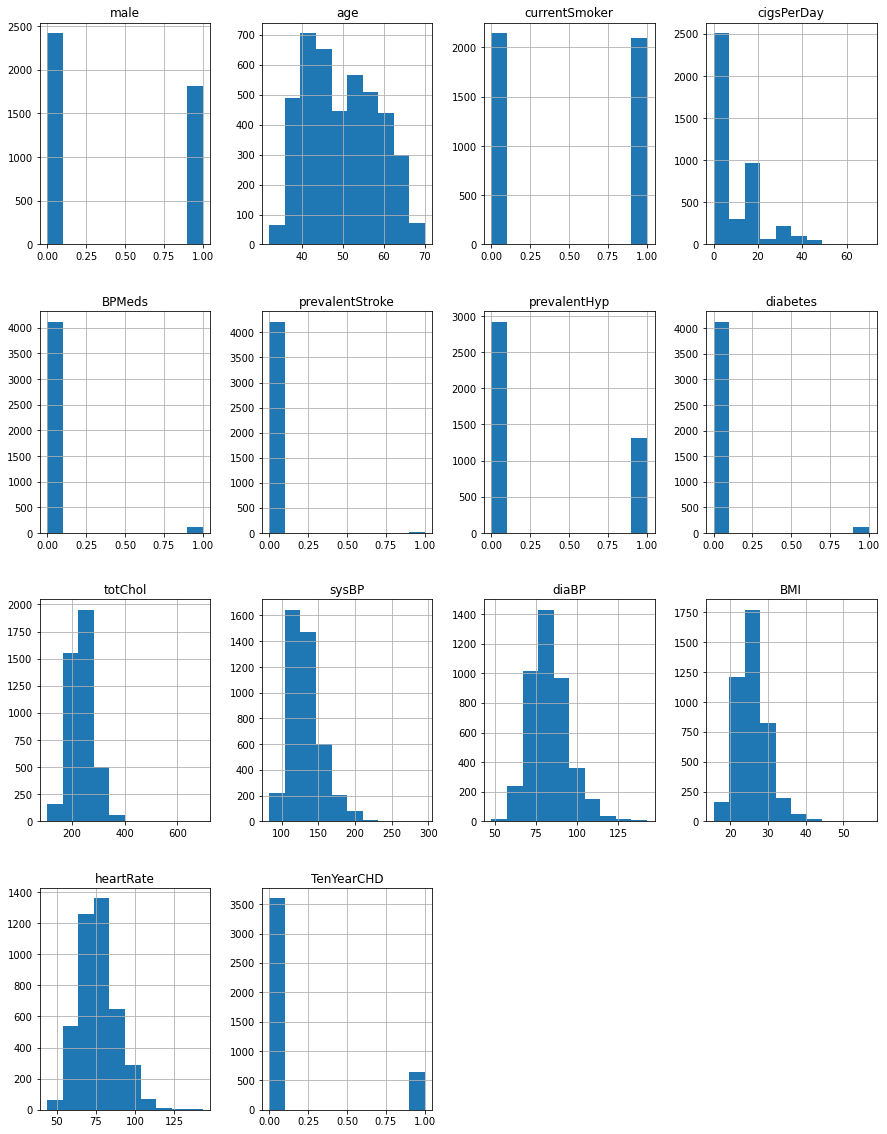

In [ ]:
#the first things we do is get the histograms of the data
df.hist(figsize = (15,20))

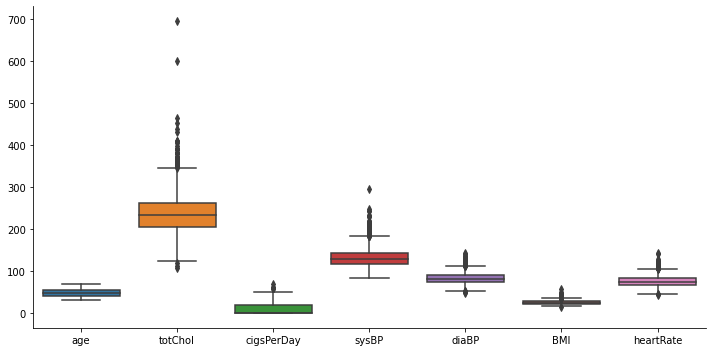

In [ ]:
#we now check the box plots for some of our data as well
vals = df[['age','totChol','cigsPerDay','sysBP',  'diaBP',    'BMI' , 'heartRate']]
sns.catplot(data=vals , kind='box',height = 5, aspect = 2)

We note that totChol and sysBP have a lot of outliers, something important to keep in mind.

We observe that most data is right-skewed.

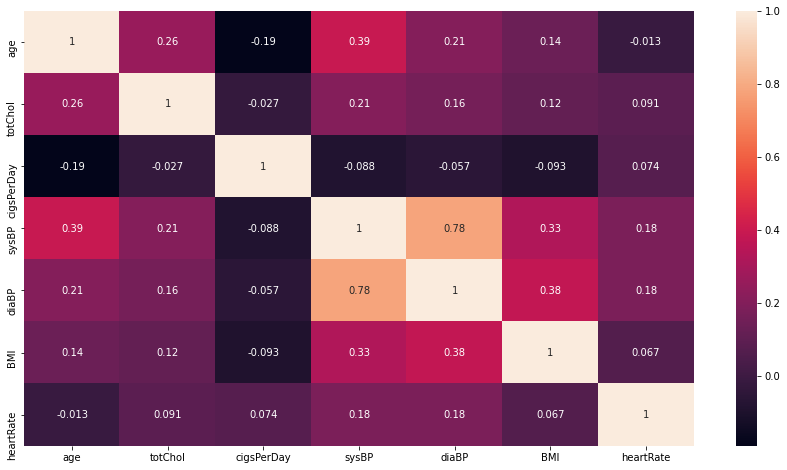

In [ ]:
#note - only numeric values are in the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(vals.corr(), annot = True)
plt.show()

There is no obvious direction in feature selection from this.  We also note that our model shouldn't be dependent on only one or two key features.

### Comparisons

We note that our numbers are very imbalanced. As such we check how much as compared to our output.  We use groupby to get the numbers.

In [ ]:
#Some example features and their relationship to TenYearCHD
features = ['male','currentSmoker','BPMeds','diabetes','prevalentStroke']

for k in features:
    data = df.groupby([k,"TenYearCHD"]).size()
    print(data)
    print("\n")

male  TenYearCHD
0     0             2119
      1              301
1     0             1477
      1              343
dtype: int64


currentSmoker  TenYearCHD
0              0             1834
               1              311
1              0             1762
               1              333
dtype: int64


BPMeds  TenYearCHD
0.0     0             3513
        1              603
1.0     0               83
        1               41
dtype: int64


diabetes  TenYearCHD
0         0             3527
          1              604
1         0               69
          1               40
dtype: int64


prevalentStroke  TenYearCHD
0                0             3582
                 1              633
1                0               14
                 1               11
dtype: int64




### Feature Selection

Here we use mutual information, since we include categorical data, to get the best features for our model

In [ ]:
df_target = df['TenYearCHD']
df_mu = df.drop('TenYearCHD', axis=1)


#import module to calculate informaion gain
encoded = df_mu.apply(pd.to_numeric)
explanatory = df_mu.columns.to_list()
encoded['TenYearCHD'] = df_target.apply(pd.to_numeric)

from sklearn.feature_selection import mutual_info_classif

#make dict with information gain for each explanantory variable
res = dict(zip(encoded.columns.to_list(),mutual_info_classif(encoded[explanatory], encoded.TenYearCHD, discrete_features=True)))

#create a data frame to display the results and sort them
res_df = pd.DataFrame.from_dict(res,orient='index', columns=['Mutual_Information'])
res_df = res_df.sort_values('Mutual_Information',ascending=False)
res_df

,Mutual_Information
BMI,0.169354
sysBP,0.054973
totChol,0.037839
diaBP,0.031957
age,0.029288
prevalentHyp,0.014776
heartRate,0.008299
cigsPerDay,0.005006
male,0.003866
diabetes,0.003685


We see that the first 6 features are better to include in our assessment.  The others seemingly offer too little information.

## Logistic Regression

We set up X and y, use train_test_split, and use several metrics to analyze our model. Since our data is unbalanced, we first use smote. 

SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

— Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

In [ ]:
#conda install -c conda-forge imbalanced-learn

In [ ]:
#conda update -n base -c defaults conda

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

T = df.drop('TenYearCHD',axis=1)
t = df.iloc[:,-1]

# the numbers before smote
num_before = dict(Counter(t))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(T, t)


#the numbers after smote
num_after =dict(Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


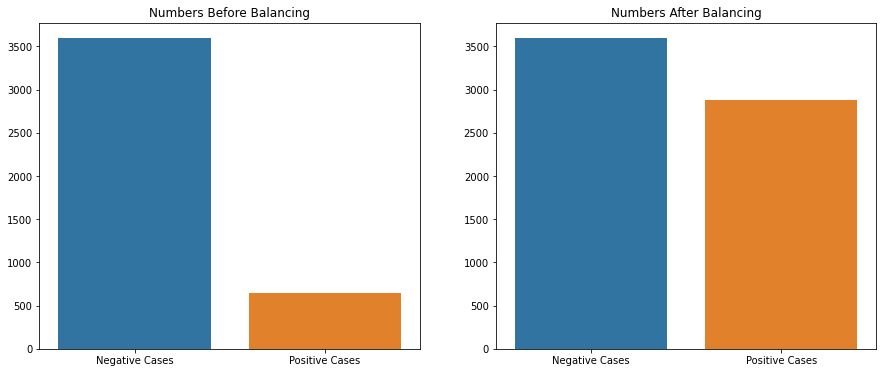

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

Here we set up the features from SMOTE, based on the mutual information

In [ ]:
#note - X_smote was returned as a numpy array, since I want to use pandas notation (although there is no need), I convert it back to a dataframe for now
#although I could use something like this notation "X = data[:, [1, 9]]" to extract columns 1 and 9 from a numpy array, it is clearer for me to recognize the column names
X_smote = pd.DataFrame(X_smote, columns=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',  'diabetes', 'totChol', 'sysBP', 'diaBP','BMI' ,'heartRate'])

In [ ]:
#features chosen from mutual information
X = X_smote[['BMI','sysBP', 'totChol', 'diaBP','age','prevalentHyp']].to_numpy()
#y = df[['TenYearCHD']].to_numpy()
y = y_smote

Now we set up our train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


Here we scale the data, otherwise it will not converge.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
## One-liner
model = LogisticRegression(penalty='l2').fit(X_train,y_train.ravel())
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.73      0.69       912
           1       0.59      0.52      0.55       706

    accuracy                           0.64      1618
   macro avg       0.63      0.62      0.62      1618
weighted avg       0.63      0.64      0.63      1618



We see that the logistic regression gave us an F1 score of .69 for predicting a 0 and a .55 for predicting a 1.  Since we used SMOTE and originally had data that was imbalanced, we ignore the precision and recall scores in favor of the macro average f1 score of .65.

Overall, this seems somewhat surprising that the top 6 most related factors only gave us a .65 score, however, we can also be very sure that we are not over or under fitting the model.  For completion, we show the confusion matrix below from which one could produce many of the various metrics.

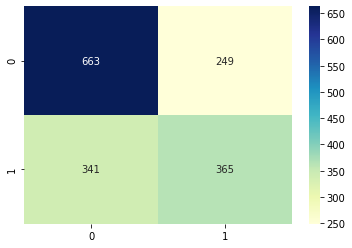

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

Below we include the roc diagram and auc score (of .71).  This seems quite interesting in that the curve does not have a faster ascension.  In other words, it seems that each of our contributing features may be quite meaningful in building the bigger picture.

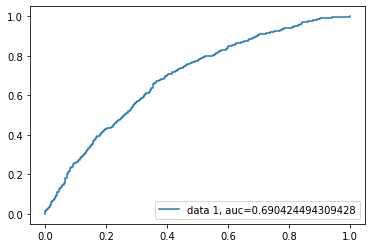

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Summary

In summary, we were curious if we could model the ten year risk of coronary heart disease.  We used several different variables, cleaning up the data, noticing that nothing stands out as obvious in our correlation matrix, and that the data was imbalanced.  We attempted to use logistic regression, a good model for a mix of categorical and numeric data. While our prediction score was not that high, we can also be sure that we are not over-fitting the data (since we used SMOTE).  Also, throughout our analysis, due to mutual information and our roc curve, it seems that each of the features is necessary in building a heuristic picture of how to deal with coronary heart disease.  It seems that one should consider many variables when wishing to address the issue.  

In short, we suggest testing out other models and comparing results both in the feature engineering/selection and the model building itself.  Perhaps a random forest would be the next step in attempting a model.
